# Importing Libraries for Depression Detection 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sb

In [2]:
data = pd.read_csv('EEG.machinelearing_data_BRMH.csv')
data.head()


,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


# Reducing Feature

In [3]:
# def get_columns_with_keywords(dataframe, keywords):
#     # Find columns that contain any of the specified keywords
#     columns_with_keywords = [column for column in dataframe.columns if any(keyword in column.lower() for keyword in keywords)]
#     return columns_with_keywords

# keywords = ['coh.f', 'specific.disorder']
# #keywords=['specific.disorder','f3','f4','fz','c3','c4','cz']
# #keywords = ['delta', 'specific.disorder']

# columns_with_keywords = get_columns_with_keywords(data, keywords)
# # len(columns_with_keywords)

# columns_to_drop = [column for column in data.columns if column not in columns_with_keywords]
# data = data.drop(columns_to_drop, axis=1)
# data

In [5]:
print("Data Shape:",data.shape)

Data Shape: (945, 1149)


In [6]:
print("Data Description: \n")
data.describe()

Data Description: 



,no.,age,education,IQ,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
count,945.000000,945.000000,930.000000,932.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,...,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,473.000000,30.594804,13.438710,101.580472,20.182936,21.177584,17.749553,18.901698,20.447079,19.490329,...,75.889633,55.049113,56.959796,60.739169,69.829254,47.862489,66.832798,39.301406,66.153213,57.056207
std,272.942302,11.781592,2.550461,17.022414,11.282022,12.230662,10.003598,9.079482,9.742912,9.252500,...,15.861641,19.541956,18.326785,18.052887,17.725321,19.685722,17.028701,20.790933,18.088548,19.600107
min,1.000000,18.000000,0.000000,49.000000,3.272260,3.244199,3.050507,3.412618,5.066593,4.048931,...,12.611954,0.519048,6.926792,0.708008,2.421748,0.036664,1.032207,1.228502,0.363268,3.988805
25%,237.000000,21.730000,12.000000,91.000000,12.784872,13.019269,11.134327,12.460586,13.548645,12.637717,...,68.014443,41.607506,43.682444,48.374883,58.937785,32.581046,55.872070,22.049743,54.710605,43.955229
50%,473.000000,26.150000,13.000000,102.000000,17.065286,17.838251,15.541469,16.733004,18.065276,17.432568,...,78.647712,55.158858,56.657348,61.257972,72.298636,45.719426,68.238375,36.549938,67.988937,57.515871
75%,709.000000,35.450000,16.000000,114.000000,24.492760,25.654394,21.623961,23.347900,25.573096,23.956748,...,87.398387,69.740640,70.649245,73.979100,83.066877,62.081839,79.192418,54.169209,79.527764,71.626382
max,945.000000,71.880000,20.000000,145.000000,92.826192,101.515687,91.373456,82.544167,101.566662,77.197502,...,99.678649,100.000000,99.307895,100.000000,99.581629,98.720067,99.650154,98.413320,100.000000,99.287092


In [7]:
data.isnull().sum()

no.                       0
sex                       0
age                       0
eeg.date                  0
education                15
                         ..
COH.F.gamma.p.P4.r.O1     0
COH.F.gamma.p.P4.s.O2     0
COH.F.gamma.q.T6.r.O1     0
COH.F.gamma.q.T6.s.O2     0
COH.F.gamma.r.O1.s.O2     0
Length: 1149, dtype: int64

In [8]:
# data.education.isnull().sum()

In [9]:
data

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,941,M,22.0,2014.8.28,13.0,116.0,Healthy control,Healthy control,41.851823,36.771496,...,82.905657,34.850706,63.970519,63.982003,51.244725,62.203684,62.062237,31.013031,31.183413,98.325230
941,942,M,26.0,2014.9.19,13.0,118.0,Healthy control,Healthy control,18.986856,19.401387,...,65.917918,66.700117,44.756285,49.787513,98.905995,54.021304,93.902401,52.740396,92.807331,56.320868
942,943,M,26.0,2014.9.27,16.0,113.0,Healthy control,Healthy control,28.781317,32.369230,...,61.040959,27.632209,45.552852,33.638817,46.690983,19.382928,41.050717,7.045821,41.962451,19.092111
943,944,M,24.0,2014.9.20,13.0,107.0,Healthy control,Healthy control,19.929100,25.196375,...,99.113664,48.328934,41.248470,28.192238,48.665743,42.007147,28.735945,27.176500,27.529522,20.028446


# **Deleting Unnecessary Features**

In [10]:
data.drop(["no.","main.disorder","sex","main.disorder", "age", "eeg.date","education", "IQ", "Unnamed: 122"], axis=1, inplace =True)
data.head()

,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,AB.A.delta.i.C3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,Alcohol use disorder,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,16.563408,29.891368,22.402246,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,Alcohol use disorder,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,9.975238,14.834740,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,Alcohol use disorder,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,12.775574,21.686306,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,Alcohol use disorder,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,8.063191,11.015078,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,Alcohol use disorder,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,15.244523,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [11]:
data.columns

Index(['specific.disorder', 'AB.A.delta.a.FP1', 'AB.A.delta.b.FP2',
       'AB.A.delta.c.F7', 'AB.A.delta.d.F3', 'AB.A.delta.e.Fz',
       'AB.A.delta.f.F4', 'AB.A.delta.g.F8', 'AB.A.delta.h.T3',
       'AB.A.delta.i.C3',
       ...
       'COH.F.gamma.o.Pz.p.P4', 'COH.F.gamma.o.Pz.q.T6',
       'COH.F.gamma.o.Pz.r.O1', 'COH.F.gamma.o.Pz.s.O2',
       'COH.F.gamma.p.P4.q.T6', 'COH.F.gamma.p.P4.r.O1',
       'COH.F.gamma.p.P4.s.O2', 'COH.F.gamma.q.T6.r.O1',
       'COH.F.gamma.q.T6.s.O2', 'COH.F.gamma.r.O1.s.O2'],
      dtype='object', length=1141)

In [12]:
data.isnull().sum()

specific.disorder        0
AB.A.delta.a.FP1         0
AB.A.delta.b.FP2         0
AB.A.delta.c.F7          0
AB.A.delta.d.F3          0
                        ..
COH.F.gamma.p.P4.r.O1    0
COH.F.gamma.p.P4.s.O2    0
COH.F.gamma.q.T6.r.O1    0
COH.F.gamma.q.T6.s.O2    0
COH.F.gamma.r.O1.s.O2    0
Length: 1141, dtype: int64

# **Dataset Preprocessing**

In [13]:

#data.rename(columns={"main.disorder":"main_disorder"}, inplace = True)
data.rename(columns={"specific.disorder":"specific_disorder"}, inplace = True)
data.head()

,specific_disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,AB.A.delta.i.C3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,Alcohol use disorder,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,16.563408,29.891368,22.402246,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,Alcohol use disorder,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,9.975238,14.834740,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,Alcohol use disorder,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,12.775574,21.686306,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,Alcohol use disorder,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,8.063191,11.015078,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,Alcohol use disorder,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,15.244523,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [14]:
features_with_null=list(data.columns[data.isna().any()])
len(features_with_null)

0

In [15]:
features_with_null

[]

In [16]:
# main_disorders = list(data.main_disorder.unique())
# main_disorders

In [17]:
specific_disoders = list(data.specific_disorder.unique())
specific_disoders

['Alcohol use disorder',
 'Acute stress disorder',
 'Depressive disorder',
 'Healthy control',
 'Behavioral addiction disorder',
 'Obsessive compulsitve disorder',
 'Schizophrenia',
 'Panic disorder',
 'Social anxiety disorder',
 'Posttraumatic stress disorder',
 'Adjustment disorder',
 'Bipolar disorder']

# Taking the two class: Depressive and Healthy

In [18]:
#mood_data = data[(data['main_disorder'] == 'Mood disorder')or(data['main_disorder']=='Healthy control')]
mood_data=data[data['specific_disorder'].isin(['Depressive disorder', 'Healthy control'])]
#mood_data=data[data']
#mood_data=data.isin({'num_wings': [0, 3]})
mood_data


,specific_disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,AB.A.delta.i.C3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
89,Depressive disorder,12.159137,13.113503,9.031007,14.879389,15.834830,19.595759,11.605911,6.084709,13.159062,...,65.408894,59.590594,77.310851,75.280467,57.311188,48.015594,59.579033,68.503920,82.885151,86.986191
90,Depressive disorder,12.404484,9.737819,13.925651,12.325169,15.130696,10.292518,10.263299,11.451697,10.243151,...,84.366954,53.402639,60.535899,73.838548,72.298636,43.330485,71.298037,23.109295,62.098128,67.749204
91,Depressive disorder,16.573145,15.586708,14.094928,12.660197,12.979617,10.611797,8.802664,7.509552,9.903838,...,62.681353,20.062716,36.041763,36.436509,47.491240,20.875426,53.747615,8.009907,50.202188,33.647889
92,Depressive disorder,26.650019,22.823161,17.942133,17.148214,15.338128,14.571966,7.983127,28.158009,12.027862,...,86.582363,83.045735,85.752150,85.875624,86.286859,79.520327,84.541455,82.452224,86.950905,87.384296
93,Depressive disorder,14.624474,14.277301,11.099375,16.047926,17.851932,17.165379,11.682990,6.193040,11.650681,...,85.309981,58.218838,61.211830,65.038486,76.899037,49.849540,71.791429,39.910653,82.739819,62.285969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,Healthy control,41.851823,36.771496,43.671792,36.860889,24.732236,23.607823,23.288260,7.520642,17.636528,...,82.905657,34.850706,63.970519,63.982003,51.244725,62.203684,62.062237,31.013031,31.183413,98.325230
941,Healthy control,18.986856,19.401387,27.586436,20.194732,19.407491,20.216570,16.465027,13.178851,12.687296,...,65.917918,66.700117,44.756285,49.787513,98.905995,54.021304,93.902401,52.740396,92.807331,56.320868
942,Healthy control,28.781317,32.369230,11.717778,23.134370,26.209302,25.484497,22.586688,11.368466,21.799254,...,61.040959,27.632209,45.552852,33.638817,46.690983,19.382928,41.050717,7.045821,41.962451,19.092111
943,Healthy control,19.929100,25.196375,14.445391,16.453456,16.590649,16.007279,18.909188,13.438102,17.442777,...,99.113664,48.328934,41.248470,28.192238,48.665743,42.007147,28.735945,27.176500,27.529522,20.028446


In [19]:
print(mood_data['specific_disorder'].value_counts())

Depressive disorder    199
Healthy control         95
Name: specific_disorder, dtype: int64


In [20]:
print(mood_data['specific_disorder'].value_counts())

Depressive disorder    199
Healthy control         95
Name: specific_disorder, dtype: int64


In [21]:
specific_mood_disoders = list(mood_data.specific_disorder.unique())
specific_mood_disoders

['Depressive disorder', 'Healthy control']

# Encoding


In [22]:
#from sklearn.preprocessing import LabelEncoder, StandardScaler

#label_encoder=LabelEncoder()
#mood_data['specific_disorder'] = label_encoder.fit_transform(mood_data['specific_disorder'])
mood_data['specific_disorder'] = mood_data['specific_disorder'].replace({"Depressive disorder":1,"Healthy control":0})
# mood_data['specific_disorder'].unique()

C:\Users\USER\AppData\Local\Temp\ipykernel_12716\2904134320.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mood_data['specific_disorder'] = mood_data['specific_disorder'].replace({"Depressive disorder":1,"Healthy control":0})


In [23]:
features=["specific_disorder"]

In [24]:
features

['specific_disorder']

In [25]:
mood_data

,specific_disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,AB.A.delta.i.C3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
89,1,12.159137,13.113503,9.031007,14.879389,15.834830,19.595759,11.605911,6.084709,13.159062,...,65.408894,59.590594,77.310851,75.280467,57.311188,48.015594,59.579033,68.503920,82.885151,86.986191
90,1,12.404484,9.737819,13.925651,12.325169,15.130696,10.292518,10.263299,11.451697,10.243151,...,84.366954,53.402639,60.535899,73.838548,72.298636,43.330485,71.298037,23.109295,62.098128,67.749204
91,1,16.573145,15.586708,14.094928,12.660197,12.979617,10.611797,8.802664,7.509552,9.903838,...,62.681353,20.062716,36.041763,36.436509,47.491240,20.875426,53.747615,8.009907,50.202188,33.647889
92,1,26.650019,22.823161,17.942133,17.148214,15.338128,14.571966,7.983127,28.158009,12.027862,...,86.582363,83.045735,85.752150,85.875624,86.286859,79.520327,84.541455,82.452224,86.950905,87.384296
93,1,14.624474,14.277301,11.099375,16.047926,17.851932,17.165379,11.682990,6.193040,11.650681,...,85.309981,58.218838,61.211830,65.038486,76.899037,49.849540,71.791429,39.910653,82.739819,62.285969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,0,41.851823,36.771496,43.671792,36.860889,24.732236,23.607823,23.288260,7.520642,17.636528,...,82.905657,34.850706,63.970519,63.982003,51.244725,62.203684,62.062237,31.013031,31.183413,98.325230
941,0,18.986856,19.401387,27.586436,20.194732,19.407491,20.216570,16.465027,13.178851,12.687296,...,65.917918,66.700117,44.756285,49.787513,98.905995,54.021304,93.902401,52.740396,92.807331,56.320868
942,0,28.781317,32.369230,11.717778,23.134370,26.209302,25.484497,22.586688,11.368466,21.799254,...,61.040959,27.632209,45.552852,33.638817,46.690983,19.382928,41.050717,7.045821,41.962451,19.092111
943,0,19.929100,25.196375,14.445391,16.453456,16.590649,16.007279,18.909188,13.438102,17.442777,...,99.113664,48.328934,41.248470,28.192238,48.665743,42.007147,28.735945,27.176500,27.529522,20.028446


In [26]:
print(mood_data['specific_disorder'].value_counts())

1    199
0     95
Name: specific_disorder, dtype: int64


In [27]:
#Shuffling the dataset
mood_data=mood_data.sample(frac=1).reset_index()
mood_data

,index,specific_disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,757,1,8.156584,9.568175,18.063783,8.221623,14.485990,12.402785,10.792797,10.923561,...,67.072929,31.504624,65.873949,46.838493,54.497973,55.532117,59.131010,25.465425,64.473773,47.763685
1,112,1,12.222513,12.348846,11.428976,10.707774,11.936981,10.651539,8.743451,5.413551,...,87.408343,61.731213,64.895188,67.395772,77.988140,57.677080,74.331834,48.415220,74.967972,70.866163
2,847,1,41.012467,44.372635,22.593716,22.744269,22.899323,24.809065,20.164113,11.812600,...,97.288229,88.939815,94.966144,95.777717,94.041011,92.276926,96.944977,83.427901,92.665253,95.318036
3,903,1,28.857343,24.268564,22.296547,26.631643,25.133965,16.817677,16.216577,13.205022,...,81.372567,55.053131,72.998823,81.337044,74.816426,56.238837,84.820241,42.768999,78.571635,73.097904
4,407,1,15.501811,15.401892,17.203992,16.898065,21.206374,19.804894,14.336062,9.887201,...,89.926085,73.440825,58.220578,57.348363,88.755222,52.028849,64.020647,46.407914,66.146408,57.602642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,929,0,16.142462,16.921597,10.640910,14.858048,17.577764,15.621570,11.934675,4.885833,...,95.290536,80.546205,92.453944,88.242247,84.180920,89.831863,90.813511,77.517602,77.618440,90.434529
290,569,1,12.238684,11.644240,11.712285,10.860268,14.630058,11.912491,10.088447,8.360146,...,81.966676,57.482087,58.814057,43.400285,79.043868,52.976771,58.001088,44.018076,59.971078,40.917898
291,539,1,27.336103,22.672542,29.587364,29.579590,35.471904,24.815438,22.500791,31.465554,...,62.366389,0.519048,48.465957,41.662297,2.908091,27.708038,52.936364,2.199482,1.643951,24.908906
292,90,1,12.404484,9.737819,13.925651,12.325169,15.130696,10.292518,10.263299,11.451697,...,84.366954,53.402639,60.535899,73.838548,72.298636,43.330485,71.298037,23.109295,62.098128,67.749204


# Dropping constant features

In [28]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(mood_data)
var_thres.get_support()
#data.columns[var_thres.get_support()]
# constant_columns = [column for column in data.columns
#                     if column not in data.columns[var_thres.get_support()]]

# print(len(constant_columns))


array([ True,  True,  True, ...,  True,  True,  True])

In [29]:
# #Preprocessing
# cls_0=data[data['specific_disorder']==0]
# cls_1=data[data['specific_disorder']==1]
# len(cls_1)
# cls_1=cls_1.sample(199,replace=True)
# data=pd.concat([cls_0,cls_1],axis=0)
# data.info()
# for x in data.columns:
#     data[x]=(data[x]-data[x].min())/(data[x].max()-data[x].min())
# data.head()


In [30]:
print(mood_data['specific_disorder'].value_counts())

1    199
0     95
Name: specific_disorder, dtype: int64


# **Standardization**

In [31]:

# # Target:
# y = mood_data['specific_disorder']
# #specify:
# scaller = StandardScaler()
# X = scaller.fit_transform(features).

In [32]:
print(mood_data['specific_disorder'].value_counts())

1    199
0     95
Name: specific_disorder, dtype: int64


In [33]:
features=mood_data.to_numpy()
features

array([[757.      ,   1.      ,   8.156584, ...,  25.465425,  64.473773,
         47.763685],
       [112.      ,   1.      ,  12.222513, ...,  48.41522 ,  74.967972,
         70.866163],
       [847.      ,   1.      ,  41.012467, ...,  83.427901,  92.665253,
         95.318036],
       ...,
       [539.      ,   1.      ,  27.336103, ...,   2.199482,   1.643951,
         24.908906],
       [ 90.      ,   1.      ,  12.404484, ...,  23.109295,  62.098128,
         67.749204],
       [336.      ,   1.      ,  31.886418, ...,  42.143465,  81.431241,
         63.2808  ]])

In [34]:
# # # Target:
# y = specific_disoders_encoding
# # #specify:
# X = preprocessing.StandardScaler().fit_transform(features)

# **Different Frequency Features**

In [35]:
delta_cols = [col for col in mood_data.columns if 'delta' in col]
beta_cols = [col for col in mood_data.columns if 'beta' in col]
theta_cols = [col for col in mood_data.columns if 'theta' in col]
alpha_cols = [col for col in mood_data.columns if 'alpha' in col]

print(f"Number of Delta Columns : {len(delta_cols)}")
print(f"Number of Beta Columns : {len(beta_cols)}")
print(f"Number of Theta Columns : {len(theta_cols)}")
print(f"Number of Alpha Columns : {len(alpha_cols)}")

Number of Delta Columns : 190
Number of Beta Columns : 380
Number of Theta Columns : 190
Number of Alpha Columns : 190


In [36]:
temp_features = delta_cols + beta_cols +theta_cols + alpha_cols
print(f"Number of items in temp_features : {len(temp_features)}")

Number of items in temp_features : 950


In [37]:
# req_features = mood_data[temp_features].to_numpy()
# # the target
# y = specific_disoders_encoding
# #the features
# X = preprocessing.StandardScaler().fit_transform(req_features)

In [38]:
mood_data

,index,specific_disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,757,1,8.156584,9.568175,18.063783,8.221623,14.485990,12.402785,10.792797,10.923561,...,67.072929,31.504624,65.873949,46.838493,54.497973,55.532117,59.131010,25.465425,64.473773,47.763685
1,112,1,12.222513,12.348846,11.428976,10.707774,11.936981,10.651539,8.743451,5.413551,...,87.408343,61.731213,64.895188,67.395772,77.988140,57.677080,74.331834,48.415220,74.967972,70.866163
2,847,1,41.012467,44.372635,22.593716,22.744269,22.899323,24.809065,20.164113,11.812600,...,97.288229,88.939815,94.966144,95.777717,94.041011,92.276926,96.944977,83.427901,92.665253,95.318036
3,903,1,28.857343,24.268564,22.296547,26.631643,25.133965,16.817677,16.216577,13.205022,...,81.372567,55.053131,72.998823,81.337044,74.816426,56.238837,84.820241,42.768999,78.571635,73.097904
4,407,1,15.501811,15.401892,17.203992,16.898065,21.206374,19.804894,14.336062,9.887201,...,89.926085,73.440825,58.220578,57.348363,88.755222,52.028849,64.020647,46.407914,66.146408,57.602642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,929,0,16.142462,16.921597,10.640910,14.858048,17.577764,15.621570,11.934675,4.885833,...,95.290536,80.546205,92.453944,88.242247,84.180920,89.831863,90.813511,77.517602,77.618440,90.434529
290,569,1,12.238684,11.644240,11.712285,10.860268,14.630058,11.912491,10.088447,8.360146,...,81.966676,57.482087,58.814057,43.400285,79.043868,52.976771,58.001088,44.018076,59.971078,40.917898
291,539,1,27.336103,22.672542,29.587364,29.579590,35.471904,24.815438,22.500791,31.465554,...,62.366389,0.519048,48.465957,41.662297,2.908091,27.708038,52.936364,2.199482,1.643951,24.908906
292,90,1,12.404484,9.737819,13.925651,12.325169,15.130696,10.292518,10.263299,11.451697,...,84.366954,53.402639,60.535899,73.838548,72.298636,43.330485,71.298037,23.109295,62.098128,67.749204


# Dealing With Missing Values

In [39]:
#mood_data.isnull().sum()

#mood_data.isna().any()
# Check for missing values in each column
# columns_with_missing_values = mood_data.isnull().any()

# Get the list of columns with missing values
# columns_list = columns_with_missing_values[columns_with_missing_values].index.tolist()

# Print the columns with missing values
# print(columns_list)
#unNamed=mood_data['Unnamed']
#unNamed

In [40]:
# 'Unnamed: 122' in mood_data.columns.values.tolist()

In [41]:
#unNamed=mood_data['Unnamed: 122']

In [42]:
#unNamed.i

In [43]:
# mood_data.drop(['Unnamed: 122'], axis=1, inplace =True)

In [44]:
mood_data

,index,specific_disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,757,1,8.156584,9.568175,18.063783,8.221623,14.485990,12.402785,10.792797,10.923561,...,67.072929,31.504624,65.873949,46.838493,54.497973,55.532117,59.131010,25.465425,64.473773,47.763685
1,112,1,12.222513,12.348846,11.428976,10.707774,11.936981,10.651539,8.743451,5.413551,...,87.408343,61.731213,64.895188,67.395772,77.988140,57.677080,74.331834,48.415220,74.967972,70.866163
2,847,1,41.012467,44.372635,22.593716,22.744269,22.899323,24.809065,20.164113,11.812600,...,97.288229,88.939815,94.966144,95.777717,94.041011,92.276926,96.944977,83.427901,92.665253,95.318036
3,903,1,28.857343,24.268564,22.296547,26.631643,25.133965,16.817677,16.216577,13.205022,...,81.372567,55.053131,72.998823,81.337044,74.816426,56.238837,84.820241,42.768999,78.571635,73.097904
4,407,1,15.501811,15.401892,17.203992,16.898065,21.206374,19.804894,14.336062,9.887201,...,89.926085,73.440825,58.220578,57.348363,88.755222,52.028849,64.020647,46.407914,66.146408,57.602642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,929,0,16.142462,16.921597,10.640910,14.858048,17.577764,15.621570,11.934675,4.885833,...,95.290536,80.546205,92.453944,88.242247,84.180920,89.831863,90.813511,77.517602,77.618440,90.434529
290,569,1,12.238684,11.644240,11.712285,10.860268,14.630058,11.912491,10.088447,8.360146,...,81.966676,57.482087,58.814057,43.400285,79.043868,52.976771,58.001088,44.018076,59.971078,40.917898
291,539,1,27.336103,22.672542,29.587364,29.579590,35.471904,24.815438,22.500791,31.465554,...,62.366389,0.519048,48.465957,41.662297,2.908091,27.708038,52.936364,2.199482,1.643951,24.908906
292,90,1,12.404484,9.737819,13.925651,12.325169,15.130696,10.292518,10.263299,11.451697,...,84.366954,53.402639,60.535899,73.838548,72.298636,43.330485,71.298037,23.109295,62.098128,67.749204


# **MinMax Scaling**

In [45]:
# import category_encoders as ce
# encoder = ce.LeaveOneOutEncoder(return_df=True)
# X_train_loo = encoder.fit_transform(X_train, y_train)
# X_test_loo = encoder.transform(X_test)
# X_train_loo.shape
# #organizing Data( to remove error for SVM)
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train_loo, y_train)

In [46]:
# 0 -> Depressed
# 1 -> Healthy

# Exporting CSV

In [47]:
#mood_data.to_csv('Preprocessed_data.csv', index= False)

# Splitting


# **Depressed & Healthy**

In [48]:
depressed=mood_data[mood_data['specific_disorder']==1]
healthy=mood_data[mood_data['specific_disorder'].isin([0])]

In [49]:
train_depressed = depressed.sample(frac=0.80)
train_healthy=healthy.sample(frac=0.80)

In [50]:
train_all=pd.concat([train_depressed,train_healthy])
#train_all
test_all=mood_data[~mood_data.isin(train_all)].dropna(how = 'all')
#test_all

In [52]:
test_depressed=test_all[test_all['specific_disorder']==0]
test_healthy=test_all[test_all['specific_disorder']==1]
y_train=train_all['specific_disorder']
x_train=train_all.loc[:, train_all.columns != 'specific_disorder']

y_test=train_all['specific_disorder']
x_test=train_all.loc[:, train_all.columns != 'specific_disorder']

# Removing Highly correlated Features

<AxesSubplot:>

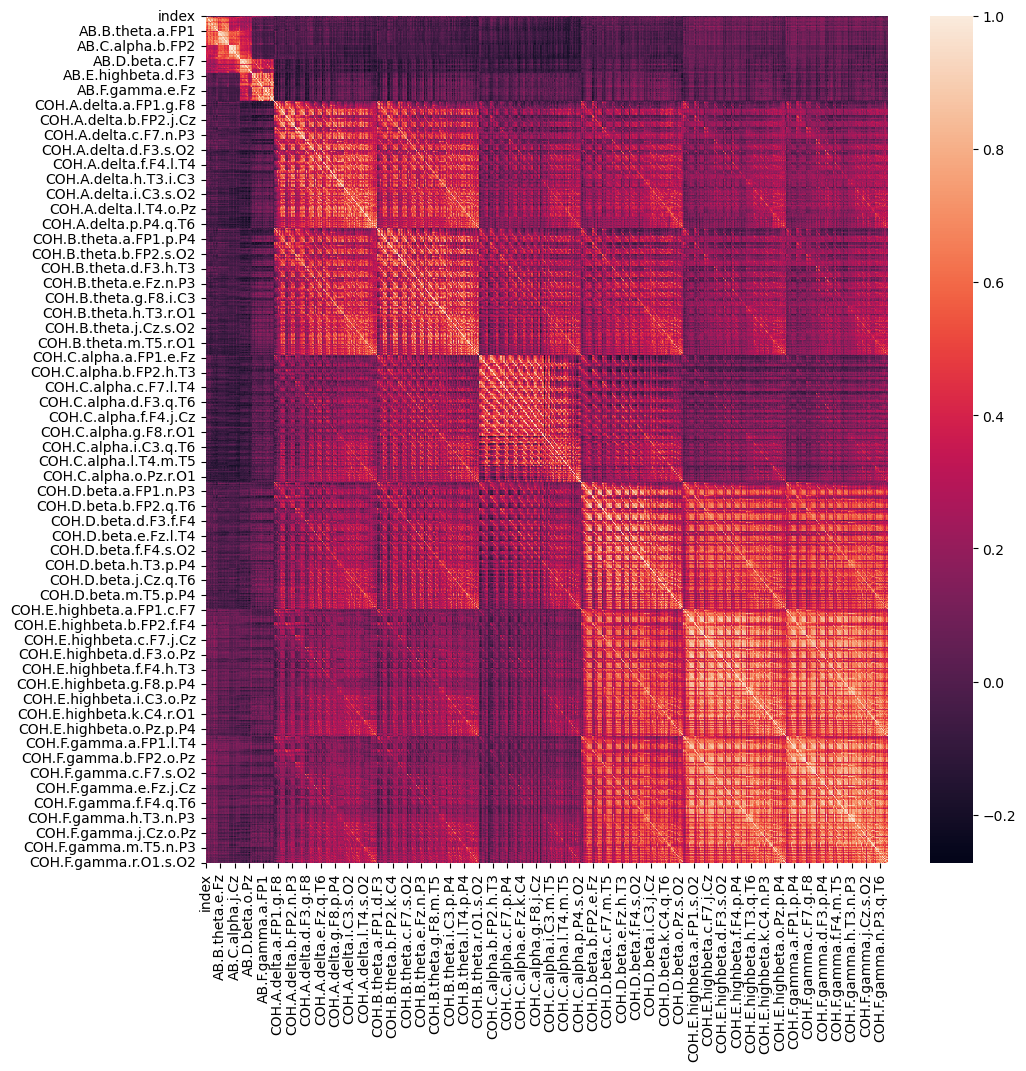

In [53]:
import seaborn as sns
#Using Pearson Correlation
corrmat = x_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [54]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(x_train, 0.7)
len(set(corr_features))
x_train=x_train.drop(corr_features,axis=1)
x_test=x_test.drop(corr_features,axis=1)
#mood_data.drop(corr_features,axis=1)

In [56]:
x_train

,index,AB.A.delta.a.FP1,AB.B.theta.a.FP1,AB.C.alpha.a.FP1,AB.C.alpha.m.T5,AB.D.beta.a.FP1,AB.D.beta.h.T3,AB.D.beta.m.T5,AB.E.highbeta.a.FP1,COH.A.delta.a.FP1.b.FP2,...,COH.C.alpha.a.FP1.n.P3,COH.C.alpha.a.FP1.q.T6,COH.C.alpha.a.FP1.r.O1,COH.C.alpha.h.T3.r.O1,COH.D.beta.a.FP1.c.F7,COH.D.beta.a.FP1.d.F3,COH.D.beta.a.FP1.h.T3,COH.D.beta.a.FP1.i.C3,COH.D.beta.a.FP1.k.C4,COH.D.beta.a.FP1.m.T5
2,847,41.012467,16.421535,34.122914,7.466390,15.159688,8.606657,8.319732,3.662196,77.796225,...,26.964995,2.717865,4.040614,7.536434,93.447128,93.334591,72.006717,80.480177,72.546269,67.471044
117,346,9.332090,27.361539,34.059402,13.068960,8.581769,5.461651,4.765337,0.973673,83.338610,...,21.478527,3.000220,1.146661,8.690128,72.543286,81.923998,48.984983,56.711901,36.270782,27.922177
158,95,28.997348,14.135115,14.105212,19.668898,17.157628,11.890408,10.882374,1.656728,81.514406,...,34.537071,29.228795,18.780231,12.061847,70.896633,89.913738,37.446769,61.358693,39.180782,10.150912
86,359,35.171357,15.610031,26.124811,13.602646,10.471076,65.973655,6.678059,1.111539,76.883874,...,33.651590,5.366378,4.101208,14.386006,77.423092,83.653311,50.612033,57.725917,52.820440,30.658614
265,761,17.675221,12.117157,87.782700,17.270699,15.795152,10.860650,13.867750,4.145958,46.038805,...,11.531318,0.679024,0.434044,10.937247,67.206903,71.926974,17.073117,39.729503,27.394973,3.526292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,122,15.795989,18.483310,25.939227,7.770920,7.617862,9.028144,5.258500,1.365436,69.148780,...,11.114441,12.962864,17.633007,7.842199,75.192677,73.464284,30.707072,19.419949,24.100376,7.924815
228,189,23.933583,15.280022,4.421645,4.575927,5.097285,5.137862,3.839728,1.099429,72.522496,...,29.190739,8.548137,1.131848,6.520503,63.015007,85.605394,22.145840,45.465241,30.474638,0.717365
82,135,9.906857,7.210525,19.179534,6.679473,9.261696,4.986393,3.618189,2.740336,97.120152,...,19.339054,54.350425,14.409726,10.276990,81.257152,82.608885,36.037946,57.845875,58.619306,5.780595
183,921,9.424917,5.178585,3.571907,2.544934,4.762917,2.132028,2.871657,2.068320,80.230380,...,12.304981,3.079855,2.587491,0.058437,48.486813,99.164680,7.478544,17.882946,10.259728,3.603444


# Forward Feature Selection

In [57]:
from sklearn.ensemble import ExtraTreesClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# Build EXC classifier to use in feature selection

clf = ExtraTreesClassifier(n_estimators=60, n_jobs=-1,random_state=42)

# Build step forward feature selection
sfs1 = sfs(clf,
           k_features=20,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=0)

# Perform SFFS
sfs1 = sfs1.fit(x_train, y_train)
#help(sfs)
# Which features?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    7.7s finished

[2023-05-24 20:40:27] Features: 1/20 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    2.6s finished

[2023-05-24 20:40:30] Features: 2/20 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    3.2s finished

[2023-05-24 20:40:33] Features: 3/20 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:  

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.4s finished

[2023-05-24 20:41:12] Features: 20/20 -- score: 1.0

In [58]:
# x_train.iloc[:, :20]
# x_test.iloc[:,:20]

In [59]:
x_train_smt = x_train 
x_test_smt = x_test
y_train_smt = y_train 
y_test_smt  = y_test

# SVM

In [60]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
modelSVC = SVC(probability=True)
modelSVC.fit(x_train_smt, y_train_smt)
print(modelSVC.score(x_test_smt, y_test_smt))

y_pred = modelSVC.predict(x_test_smt)
y_final = y_test
y_pred_svc = y_pred
ac = accuracy_score(y_test_smt, y_pred)
print(ac)

0.8765957446808511
0.8765957446808511


In [61]:
# Performance Measure of SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = modelSVC.predict(x_test_smt)
print(confusion_matrix(y_test_smt, y_pred))
print(classification_report(y_test_smt, y_pred))

[[ 62  14]
 [ 15 144]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        76
           1       0.91      0.91      0.91       159

    accuracy                           0.88       235
   macro avg       0.86      0.86      0.86       235
weighted avg       0.88      0.88      0.88       235



In [62]:
from sklearn.metrics import cohen_kappa_score
cmSVC = confusion_matrix(y_test_smt, modelSVC.predict(x_test_smt))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmSVC[1,1]  
TN = cmSVC[0,0] 
FP = cmSVC[0,1] 
FN = cmSVC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
totalSVC=sum(sum(cmSVC))
Accuracy = (TN+TP)/totalSVC
# MCC
val = (TP * TN) - (FP * FN)
MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred = modelSVC.predict(x_test_smt)
cohen_score = cohen_kappa_score(y_test_smt, Y_pred)

print("Sensitivity/TPR: " + str(TPR))
print("FPR: " + str(FPR))
print("Specificity/TNR: " + str(TNR))
print("MCC: " + str(MCC_SVC))
print("Cohen Kappa: " + str(cohen_score))

Sensitivity/TPR: 0.9056603773584906
FPR: 0.18421052631578946
Specificity/TNR: 0.8157894736842105
MCC: 0.719014419952624
Cohen Kappa: 0.7189806605913158


In [63]:
# AUC Score
from sklearn.metrics import roc_auc_score

# predict probabilities
pred_prob1 = modelSVC.predict_proba(x_test_smt)
pred_prob2 = modelSVC.predict_proba(x_test_smt)

# auc scores
auc_score1 = roc_auc_score(y_test_smt, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test_smt, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.9075637206223105 0.9075637206223105


In [64]:
# Support Vector Classifier K - Fold CV
from sklearn.model_selection import cross_val_score
cv_score_for_SVC = cross_val_score(modelSVC, x_train_smt, y_train_smt, cv = 10)
cv_score_for_SVC

array([0.66666667, 0.83333333, 0.83333333, 0.95833333, 0.875     ,
       0.86956522, 0.91304348, 0.82608696, 0.86956522, 0.95652174])

In [65]:
from statistics import mean
print('Accuracy mean and std : %.3f (%.3f)' % (mean(cv_score_for_SVC), np.std(cv_score_for_SVC)))

Accuracy mean and std : 0.860 (0.079)


In [66]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = modelSVC.predict(x_test_smt)
print(confusion_matrix(y_test_smt, y_pred))
print(classification_report(y_test_smt, y_pred))

[[ 62  14]
 [ 15 144]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        76
           1       0.91      0.91      0.91       159

    accuracy                           0.88       235
   macro avg       0.86      0.86      0.86       235
weighted avg       0.88      0.88      0.88       235



# Decision Tree Classifier Train, Test

In [67]:
from sklearn import tree
from sklearn.metrics import accuracy_score


modelDTC = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5)
modelDTC.fit(x_train_smt, y_train_smt)
print(modelDTC.score(x_test_smt, y_test_smt))

# Predicting the Test set results
y_pred = modelDTC.predict(x_test_smt)
ac = accuracy_score(y_test_smt, y_pred)
print(ac)

1.0
1.0


In [68]:
# Performance Measure of DTC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = modelDTC.predict(x_test_smt)
print(confusion_matrix(y_test_smt, y_pred))
print(classification_report(y_test_smt, y_pred))

[[ 76   0]
 [  0 159]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00       159

    accuracy                           1.00       235
   macro avg       1.00      1.00      1.00       235
weighted avg       1.00      1.00      1.00       235



In [69]:
from sklearn.metrics import cohen_kappa_score
cmDTC = confusion_matrix(y_test_smt, modelDTC.predict(x_test_smt))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmDTC[1,1]  
TN = cmDTC[0,0] 
FP = cmDTC[0,1] 
FN = cmDTC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalDTC=sum(sum(cmDTC))
Accuracy = (TN+TP)/totalDTC
# MCC
val = (TP * TN) - (FP * FN)
MCC_DTC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred = modelDTC.predict(x_test_smt)
cohen_score = cohen_kappa_score(y_test_smt, Y_pred)

print("Sensitivity/TPR: " + str(TPR))
print("FPR: " + str(FPR))
print("Specificity/TNR: " + str(TNR))
print("MCC: " + str(MCC_DTC))
print("Cohen Kappa: " + str(cohen_score))

Sensitivity/TPR: 1.0
FPR: 0.0
Specificity/TNR: 1.0
MCC: 1.0
Cohen Kappa: 1.0


In [70]:
#AUC Score
from sklearn.metrics import roc_auc_score

# predict probabilities
pred_prob1 = modelDTC.predict_proba(x_test_smt)
pred_prob2 = modelDTC.predict_proba(x_test_smt)

# auc scores
auc_score1 = roc_auc_score(y_test_smt, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test_smt, pred_prob2[:,1])

print(auc_score1, auc_score2)

1.0 1.0


In [71]:
# Decision Tree Classifier K - Fold CV
from sklearn.model_selection import cross_val_score
cv_score_for_DTC = cross_val_score(modelDTC, x_train_smt, y_train_smt, cv = 10)
cv_score_for_DTC

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.95652174, 1.        ])

In [72]:
print('Accuracy mean and std : %.3f (%.3f)' % (np.mean(cv_score_for_DTC), np.std(cv_score_for_DTC)))

Accuracy mean and std : 0.996 (0.013)


# Random Forest Training and Testing

In [73]:
from sklearn import ensemble
from sklearn.metrics import accuracy_score

modelRFC = ensemble.RandomForestClassifier(n_estimators = 5)
modelRFC.fit(x_train_smt, y_train_smt)
print(modelRFC.score(x_test_smt, y_test_smt))


# Predicting the Test set results
y_pred = modelRFC.predict(x_test_smt)
ac = accuracy_score(y_test_smt, y_pred)

y_pred_rf = y_pred
print(ac)

0.9914893617021276
0.9914893617021276


In [74]:
# Performance Measure of RFC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = modelRFC.predict(x_test_smt)
#print(confusion_matrix(y_test_smt, y_pred))
#print(classification_report(y_test_smt, y_pred))
cr=classification_report(y_test_smt,y_pred)
f1Score=cr[2][0]
print(f1Score)

In [75]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test_smt, modelRFC.predict(x_test_smt))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred = modelRFC.predict(x_test_smt)
cohen_score = cohen_kappa_score(y_test_smt, Y_pred)

print("Sensitivity/TPR: " + str(TPR))
print("FPR: " + str(FPR))
print("Specificity/TNR: " + str(TNR))
print("MCC: " + str(MCC_RFC))
print("Cohen Kappa: " + str(cohen_score))

Sensitivity/TPR: 0.9937106918238994
FPR: 0.013157894736842105
Specificity/TNR: 0.9868421052631579
MCC: 0.9805527970870572
Cohen Kappa: 0.9805527970870572


In [76]:
#AUC Score
from sklearn.metrics import roc_auc_score

# predict probabilities
pred_prob1 = modelRFC.predict_proba(x_test_smt)
pred_prob2 = modelRFC.predict_proba(x_test_smt)

# auc scores
auc_score1 = roc_auc_score(y_test_smt, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test_smt, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.999503475670308 0.999503475670308


In [77]:
# Random Forest Classifier K - Fold CV
from sklearn.model_selection import cross_val_score
cv_score_for_RFC = cross_val_score(modelRFC, x_train_smt, y_train_smt, cv = 10)
cv_score_for_RFC

array([0.66666667, 0.625     , 0.79166667, 0.83333333, 0.625     ,
       0.95652174, 0.69565217, 0.86956522, 0.69565217, 0.91304348])

In [78]:
print('Accuracy mean and std : %.3f (%.3f)' % (np.mean(cv_score_for_RFC), np.std(cv_score_for_RFC)))

Accuracy mean and std : 0.767 (0.115)


# Logistic Regression Train, Test

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

modelLR = LogisticRegression()
modelLR.fit(x_train_smt, y_train_smt)
print(modelLR.score(x_test_smt, y_test_smt))


# Predicting the Test set results
y_pred = modelLR.predict(x_test_smt)
ac = accuracy_score(y_test_smt, y_pred)
print(ac)

0.7617021276595745
0.7617021276595745


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
# Performance Measure of Logistic regression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = modelLR.predict(x_test_smt)
print(confusion_matrix(y_test_smt, y_pred))
print(classification_report(y_test_smt, y_pred))

[[ 41  35]
 [ 21 138]]
              precision    recall  f1-score   support

           0       0.66      0.54      0.59        76
           1       0.80      0.87      0.83       159

    accuracy                           0.76       235
   macro avg       0.73      0.70      0.71       235
weighted avg       0.75      0.76      0.75       235



In [81]:
from sklearn.metrics import cohen_kappa_score
cmLR = confusion_matrix(y_test_smt, modelLR.predict(x_test_smt))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmLR[1,1]  
TN = cmLR[0,0] 
FP = cmLR[0,1] 
FN = cmLR[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalLR=sum(sum(cmLR))
Accuracy = (TN+TP)/totalLR
# MCC
val = (TP * TN) - (FP * FN)
MCC_LR = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred = modelLR.predict(x_test_smt)
cohen_score = cohen_kappa_score(y_test_smt, Y_pred)

print("Sensitivity/TPR: " + str(TPR))
print("FPR: " + str(FPR))
print("Specificity/TNR: " + str(TNR))
print("MCC: " + str(MCC_LR))
print("Cohen Kappa: " + str(cohen_score))

Sensitivity/TPR: 0.8679245283018868
FPR: 0.4605263157894737
Specificity/TNR: 0.5394736842105263
MCC: 0.4324198095411789
Cohen Kappa: 0.42797531078848994


In [82]:
# AUC score
from sklearn.metrics import roc_auc_score

# predict probabilities
pred_prob1 = modelLR.predict_proba(x_test_smt)
pred_prob2 = modelLR.predict_proba(x_test_smt)

# auc scores
auc_score1 = roc_auc_score(y_test_smt, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test_smt, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.8244786494538232 0.8244786494538232


In [83]:
# Logistic Regression K-fold CV
from sklearn.model_selection import cross_val_score
cv_score_for_LR = cross_val_score(modelLR, x_train_smt, y_train_smt, cv = 10)
cv_score_for_LR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.5       , 0.54166667, 0.66666667, 0.70833333, 0.70833333,
       0.65217391, 0.65217391, 0.7826087 , 0.69565217, 0.7826087 ])

In [84]:
print('Accuracy mean and std : %.3f (%.3f)' % (np.mean(cv_score_for_LR), np.std(cv_score_for_LR)))

Accuracy mean and std : 0.669 (0.087)


# AdaBoost Algorithm Train, Test 

In [85]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

modelABC = AdaBoostClassifier(random_state = 10)
modelABC.fit(x_train_smt, y_train_smt)
print(modelABC.score(x_test_smt, y_test_smt))

# Predicting the Test set results
y_pred = modelABC.predict(x_test_smt)
ac = accuracy_score(y_test_smt, y_pred)
print(ac)

1.0
1.0


<b>Performance Measure of AdaBoost </b>

In [86]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = modelABC.predict(x_test_smt)
print(confusion_matrix(y_test_smt, y_pred))
print(classification_report(y_test_smt, y_pred))

[[ 76   0]
 [  0 159]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00       159

    accuracy                           1.00       235
   macro avg       1.00      1.00      1.00       235
weighted avg       1.00      1.00      1.00       235



In [87]:
from sklearn.metrics import cohen_kappa_score
cmABC = confusion_matrix(y_test_smt, modelABC.predict(x_test_smt))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmABC[1,1]  
TN = cmABC[0,0] 
FP = cmABC[0,1] 
FN = cmABC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalABC = sum(sum(cmABC))
Accuracy = (TN+TP)/totalABC

# MCC
val = (TP * TN) - (FP * FN)
MCC_ABC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

# Cohen Kappa
Y_pred = modelABC.predict(x_test_smt)
cohen_score = cohen_kappa_score(y_test_smt, Y_pred)

print("Sensitivity/TPR: " + str(TPR))
print("FPR: " + str(FPR))
print("Specificity/TNR: " + str(TNR))
print("MCC: " + str(MCC_ABC))
print("Cohen Kappa: " + str(cohen_score))

Sensitivity/TPR: 1.0
FPR: 0.0
Specificity/TNR: 1.0
MCC: 1.0
Cohen Kappa: 1.0


<b> AUC Score </b>

In [88]:
from sklearn.metrics import roc_auc_score

# predict probabilities
pred_prob1 = modelABC.predict_proba(x_test_smt)
pred_prob2 = modelABC.predict_proba(x_test_smt)

# auc scores
auc_score1 = roc_auc_score(y_test_smt, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test_smt, pred_prob2[:,1])

print(auc_score1, auc_score2)

1.0 1.0


<b> AdaBoost Algorithm With K-Fold CV </b>

In [89]:
from sklearn.model_selection import cross_val_score
cv_score_for_ABC = cross_val_score(modelABC, x_train_smt, y_train_smt, cv = 10)
print(cv_score_for_ABC)
print('Accuracy mean and std : %.3f (%.3f)' % (np.mean(cv_score_for_ABC), np.std(cv_score_for_ABC)))

[1.         1.         1.         1.         1.         1.
 1.         1.         0.95652174 1.        ]
Accuracy mean and std : 0.996 (0.013)


## XGBoost

In [90]:
# Training the Naive Bayes model on the Training set
#conda install -c anaconda py-xgboost
!pip install xgboost
import xgboost as xgb
from sklearn.metrics import accuracy_score

modelXGB = xgb.XGBClassifier()

modelXGB.fit(x_train_smt, y_train_smt)
print('Training',modelXGB.score(x_train_smt, y_train_smt))
# Predicting the Test set results
y_pred = modelXGB.predict(x_test_smt)
ac = accuracy_score(y_test_smt, y_pred)
print('Testing',ac)
cm = confusion_matrix(y_test_smt, y_pred)
cm

Defaulting to user installation because normal site-packages is not writeable
Training 1.0
Testing 1.0


array([[ 76,   0],
       [  0, 159]], dtype=int64)

In [91]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = modelXGB.predict(x_test_smt)
print(confusion_matrix(y_test_smt, y_pred))
print(classification_report(y_test_smt, y_pred))

[[ 76   0]
 [  0 159]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00       159

    accuracy                           1.00       235
   macro avg       1.00      1.00      1.00       235
weighted avg       1.00      1.00      1.00       235



In [92]:
from sklearn.metrics import cohen_kappa_score
cmGNB = confusion_matrix(y_test_smt, modelXGB.predict(x_test_smt))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmGNB[1,1]  
TN = cmGNB[0,0] 
FP = cmGNB[0,1] 
FN = cmGNB[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalGNB=sum(sum(cmGNB))
Accuracy = (TN+TP)/totalGNB
# MCC
val = (TP * TN) - (FP * FN)
MCC_GNB = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred = modelXGB.predict(x_test_smt)
cohen_score = cohen_kappa_score(y_test_smt, Y_pred)

print("Sensitivity/TPR: " + str(TPR))
print("FPR: " + str(FPR))
print("Specificity/TNR: " + str(TNR))
print("MCC: " + str(MCC_GNB))
print("Cohen Kappa: " + str(cohen_score))

Sensitivity/TPR: 1.0
FPR: 0.0
Specificity/TNR: 1.0
MCC: 1.0
Cohen Kappa: 1.0


<b> AUC Score </b>

In [93]:
from sklearn.metrics import roc_auc_score

# predict probabilities
pred_prob1 = modelXGB.predict_proba(x_test_smt)
pred_prob2 = modelXGB.predict_proba(x_test_smt)

# auc scores
auc_score1 = roc_auc_score(y_test_smt, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test_smt, pred_prob2[:,1])

print(auc_score1, auc_score2)

1.0 1.0


In [94]:
from sklearn.model_selection import cross_val_score
cv_score_for_xgb= cross_val_score(modelXGB, x_train_smt, y_train_smt, cv = 10)
print(cv_score_for_xgb)
print('Accuracy mean and std : %.3f (%.3f)' % (np.mean(cv_score_for_xgb), np.std(cv_score_for_xgb)))

[1.         1.         1.         0.95833333 1.         1.
 1.         0.95652174 0.95652174 1.        ]
Accuracy mean and std : 0.987 (0.020)


# KNN

In [95]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)
y_pred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

# Evaluation

In [96]:
from sklearn import metrics
print("Accuracy is",metrics.accuracy_score(y_test,y_pred)," when k = 3")
print("Accuracy is",metrics.accuracy_score(y_test,y_pred)," when k = 5")
print("Accuracy is",metrics.accuracy_score(y_test,y_pred)," when k = 7")

Accuracy is 0.9531914893617022  when k = 3
Accuracy is 0.9531914893617022  when k = 5
Accuracy is 0.9531914893617022  when k = 7


In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.89      0.93        76
           1       0.95      0.98      0.97       159

    accuracy                           0.95       235
   macro avg       0.95      0.94      0.95       235
weighted avg       0.95      0.95      0.95       235



## Stacking Ensemble

In [98]:
#make a prediction with a stacking ensemble
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


# define the base models
level0 = list()
#level0.append(('lr', LogisticRegression()))  #52.8%  (but increasing the accuracy)
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))  #adding it gives worst performance
#level0.append(('CB',CatBoostClassifier(iterations=500)))
#level0.append(('svm', SVC()))  #58.6%
#level0.append(('xgb',xgb.XGBClassifier()))   #69.9%
level0.append(('rf', ensemble.RandomForestClassifier()))  # 72


# define meta learner model
#level1 = LogisticRegression()
level1 = ensemble.RandomForestClassifier()
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=10)

# fit the model on all available data
model.fit(x_train_smt, y_train_smt)

y_pred = model.predict(x_test_smt)
ac = accuracy_score(y_test_smt, y_pred)
print('Testing',ac)
cm = confusion_matrix(y_test_smt, y_pred)
cm

Testing 1.0


array([[ 76,   0],
       [  0, 159]], dtype=int64)

# 5-Fold Cross Validation SVM

In [99]:
depressed=mood_data[mood_data['specific_disorder']==1]
healthy=mood_data[mood_data['specific_disorder'].isin([0])]


fold_names = []
accuracies = []
Sensitivity = []
Specificity=[]
F1Score=[]
FPRs = []
cohen_kappas = []
auc_scores = []
    
final_ac=0
final_TPR=0  #Sensitivity, recall
final_TNR=0  # Specifity
final_f1Score=0
final_PPV=0  # Precission
final_FPR=0  
final_cohen_score=0
final_auc_score1=0
for i in range(5):
    fr=(i+1)*40
    if i==4:
        fr=fr-1
    #print(fr)
    test_depressed = depressed.iloc[i*40:fr, :]
    #test_depressed.head()
    train_depressed = depressed[~depressed.isin(test_depressed)].dropna(how = 'all')
    train_depressed
    test_healthy = healthy.iloc[i*(19):19*(i+1), :]
    #print(19*(i+1))
    #test_depressed.head()
    train_healthy = healthy[~healthy.isin(test_healthy)].dropna(how = 'all')
    train_healthy
    train_all=pd.concat([train_depressed,train_healthy])
    test_all=pd.concat([test_depressed,test_healthy])
    y_train=train_all['specific_disorder']
    x_train=train_all.drop('specific_disorder', axis=1)
    y_test=test_all['specific_disorder']
    x_test=test_all.drop('specific_disorder', axis=1)
    x_train_smt = x_train 
    x_test_smt = x_test
    y_train_smt = y_train 
    y_test_smt  = y_test
    

    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    modelSVC = SVC(probability=True)
    modelSVC.fit(x_train_smt, y_train_smt)
    #print(modelSVC.score(x_test_smt, y_test_smt))

    y_pred = modelSVC.predict(x_test_smt)
    y_final = y_test
    y_pred_svc = y_pred
    ac = accuracy_score(y_test_smt, y_pred)
    print(ac)
    
    
    # Performance Measure of SVC
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    y_pred = modelSVC.predict(x_test_smt)
    #print(confusion_matrix(y_test_smt, y_pred))
    #print(classification_report(y_test_smt, y_pred))
    from sklearn.metrics import cohen_kappa_score
    cmSVC = confusion_matrix(y_test_smt, modelSVC.predict(x_test_smt))
    cmSVC
    
    #If we use TP TN FP and FN of below's comment we get range
    #FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
    #FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
    #TP = np.diag(cmSVC)
    #TN = cmSVC.sum() - (FP + FN + TP)
    
    TP = cmSVC[1,1]  
    TN = cmSVC[0,0] 
    FP = cmSVC[0,1] 
    FN = cmSVC[1,0] 
    
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/float(TP+FN)
    # Specificity or true negative rate
    TNR = TN/float(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/float(TP+FP)
    # Negative predictive value
    NPV = TN/float(TN+FN)
    # Fall out or false positive rate
    FPR = FP/float(FP+TN)
    # False negative rate
    FNR = FN/float(TP+FN)
    # False discovery rate
    FDR = FP/float(TP+FP)
    totalSVC=sum(sum(cmSVC))
    Accuracy = (TN+TP)/totalSVC
    # MCC
    val = (TP * TN) - (FP * FN)
    MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
    # Cohen Kappa
    Y_pred = modelSVC.predict(x_test_smt)
    cohen_score = cohen_kappa_score(y_test_smt, Y_pred)
    
    #print("Sensitivity/TPR: " + str(TPR))
    #print("FPR: " + str(FPR))
    #print("Specificity/TNR: " + str(TNR))
    #print("MCC: " + str(MCC_SVC))
    #print("Cohen Kappa: " + str(cohen_score))
    
    # AUC Score
    from sklearn.metrics import roc_auc_score

    # predict probabilities
    pred_prob1 = modelSVC.predict_proba(x_test_smt)
    pred_prob2 = modelSVC.predict_proba(x_test_smt)

    # auc scores
    auc_score1 = roc_auc_score(y_test_smt, pred_prob1[:,1])
    auc_score2 = roc_auc_score(y_test_smt, pred_prob2[:,1])

    #print(auc_score1, auc_score2)
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    y_pred = modelSVC.predict(x_test_smt)
    #print(confusion_matrix(y_test_smt, y_pred))
    #print(classification_report(y_test_smt, y_pred))
    
    foldNo="fold "+str(i+1)
    final_ac=final_ac+ac
    final_TPR=final_TPR+TPR
    final_TNR=final_TNR+TNR
    final_FPR=final_FPR+FPR
    final_cohen_score=final_cohen_score+cohen_score
    final_auc_score1=final_auc_score1+auc_score1
    f1Score=2*(TPR*PPV)/(TPR+PPV)
    final_f1Score=final_f1Score+f1Score
    fold_names.append(foldNo)
    accuracies.append(ac)
    Sensitivity.append(TPR)
    Specificity.append(TNR)
    F1Score.append(f1Score)
    FPRs.append(FPR)
    cohen_kappas.append(cohen_score)
    auc_scores.append(auc_score1)
    
final_ac=final_ac/5.0
final_TPR=final_TPR/5.0
final_TNR=final_TNR/5.0
final_f1Score=final_f1Score/5.0
final_FPR=final_FPR/5.0
final_cohen_score=final_cohen_score/5.0
final_auc_score1=final_auc_score1/5.0

foldNo="average"
fold_names.append(foldNo)
accuracies.append(final_ac)
Sensitivity.append(final_TPR)
Specificity.append(final_TNR)
F1Score.append(final_f1Score)
FPRs.append(final_FPR)
cohen_kappas.append(final_cohen_score)
auc_scores.append(final_auc_score1)


Performance_Matrix = {
    "SVM": fold_names,
    "Accuracy": accuracies,
    "Sensitivity": Sensitivity,
    "Specificity": Specificity,
    "F1-Score": F1Score,
    "FPR": FPRs
   # "AUC": auc_scores
    # Add more key-value pairs for other metrics if needed
}
 
Performance_Matrix = pd.DataFrame(Performance_Matrix)
Performance_Matrix


0.7796610169491526
0.864406779661017
0.7966101694915254
0.7966101694915254
0.7931034482758621


,SVM,Accuracy,Sensitivity,Specificity,F1-Score,FPR
0,fold 1,0.779661,0.850000,0.631579,0.839506,0.368421
1,fold 2,0.864407,0.950000,0.684211,0.904762,0.315789
2,fold 3,0.796610,0.850000,0.684211,0.850000,0.315789
3,fold 4,0.796610,0.950000,0.473684,0.863636,0.526316
4,fold 5,0.793103,0.897436,0.578947,0.853659,0.421053
5,average,0.806078,0.899487,0.610526,0.862313,0.389474


# 5 Fold Cross Validation of Decision Tree Classifier

In [100]:
depressed=mood_data[mood_data['specific_disorder']==1]
healthy=mood_data[mood_data['specific_disorder'].isin([0])]


fold_names = []
accuracies = []
Sensitivity = []
Specificity=[]
F1Score=[]
FPRs = []
cohen_kappas = []
auc_scores = []
    
final_ac=0
final_TPR=0  #Sensitivity, recall
final_TNR=0  # Specifity
final_f1Score=0
final_PPV=0  # Precission
final_FPR=0  
final_cohen_score=0
final_auc_score1=0
for i in range(5):
    fr=(i+1)*40
    if i==4:
        fr=fr-1
    #print(fr)
    test_depressed = depressed.iloc[i*40:fr, :]
    #test_depressed.head()
    train_depressed = depressed[~depressed.isin(test_depressed)].dropna(how = 'all')
    train_depressed
    test_healthy = healthy.iloc[i*(19):19*(i+1), :]
    #print(19*(i+1))
    #test_depressed.head()
    train_healthy = healthy[~healthy.isin(test_healthy)].dropna(how = 'all')
    train_healthy
    train_all=pd.concat([train_depressed,train_healthy])
    test_all=pd.concat([test_depressed,test_healthy])
    y_train=train_all['specific_disorder']
    x_train=train_all.drop('specific_disorder', axis=1)
    y_test=test_all['specific_disorder']
    x_test=test_all.drop('specific_disorder', axis=1)
    x_train_smt = x_train 
    x_test_smt = x_test
    y_train_smt = y_train 
    y_test_smt  = y_test
    

    #Decission Tree Main Model
    
    from sklearn import tree
    from sklearn.metrics import accuracy_score


    modelDTC = tree.DecisionTreeClassifier(max_depth=19, min_samples_leaf=9, min_samples_split=10)
    modelDTC.fit(x_train_smt, y_train_smt)
    #print(modelDTC.score(x_test_smt, y_test_smt))

    # Predicting the Test set results
    y_pred = modelDTC.predict(x_test_smt)
    ac = accuracy_score(y_test_smt, y_pred)
    print(ac)

    
    # Performance Measure of DTC

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    y_pred = modelDTC.predict(x_test_smt)
    
    from sklearn.metrics import cohen_kappa_score
    cmDTC = confusion_matrix(y_test_smt, modelDTC.predict(x_test_smt))

    #If we use TP TN FP and FN of below's comment we get range
    #FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
    #FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
    #TP = np.diag(cmSVC)
    #TN = cmSVC.sum() - (FP + FN + TP)

    TP = cmDTC[1,1]  
    TN = cmDTC[0,0] 
    FP = cmDTC[0,1] 
    FN = cmDTC[1,0] 

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/float(TP+FN)
    # Specificity or true negative rate
    TNR = TN/float(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/float(TP+FP)
    # Negative predictive value
    NPV = TN/float(TN+FN)
    # Fall out or false positive rate
    FPR = FP/float(FP+TN)
    # False negative rate
    FNR = FN/float(TP+FN)
    # False discovery rate
    FDR = FP/float(TP+FP)
    # Accuracy
    totalDTC=sum(sum(cmDTC))
    Accuracy = (TN+TP)/totalDTC
    # MCC
    val = (TP * TN) - (FP * FN)
    MCC_DTC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
    # Cohen Kappa
    Y_pred = modelDTC.predict(x_test_smt)
    cohen_score = cohen_kappa_score(y_test_smt, Y_pred)

    #print("Sensitivity/TPR: " + str(TPR))
    #print("FPR: " + str(FPR))
    #print("Specificity/TNR: " + str(TNR))
    #print("MCC: " + str(MCC_DTC))
    #print("Cohen Kappa: " + str(cohen_score))
    
    #AUC Score
    from sklearn.metrics import roc_auc_score

    # predict probabilities
    pred_prob1 = modelDTC.predict_proba(x_test_smt)
    pred_prob2 = modelDTC.predict_proba(x_test_smt)

    # auc scores
    auc_score1 = roc_auc_score(y_test_smt, pred_prob1[:,1])
    auc_score2 = roc_auc_score(y_test_smt, pred_prob2[:,1])



   
    foldNo="fold "+str(i+1)
    final_ac=final_ac+ac
    final_TPR=final_TPR+TPR
    final_TNR=final_TNR+TNR
    final_FPR=final_FPR+FPR
    final_cohen_score=final_cohen_score+cohen_score
    final_auc_score1=final_auc_score1+auc_score1
    f1Score=2*(TPR*PPV)/(TPR+PPV)
    final_f1Score=final_f1Score+f1Score
    fold_names.append(foldNo)
    accuracies.append(ac)
    Sensitivity.append(TPR)
    Specificity.append(TNR)
    F1Score.append(f1Score)
    FPRs.append(FPR)
    cohen_kappas.append(cohen_score)
    auc_scores.append(auc_score1)
    
final_ac=final_ac/5.0
final_TPR=final_TPR/5.0
final_TNR=final_TNR/5.0
final_f1Score=final_f1Score/5.0
final_FPR=final_FPR/5.0
final_cohen_score=final_cohen_score/5.0
final_auc_score1=final_auc_score1/5.0

foldNo="average"
fold_names.append(foldNo)
accuracies.append(final_ac)
Sensitivity.append(final_TPR)
Specificity.append(final_TNR)
F1Score.append(final_f1Score)
FPRs.append(final_FPR)
cohen_kappas.append(final_cohen_score)
auc_scores.append(final_auc_score1)


Performance_Matrix = {
    "DecissionTree": fold_names,
    "Accuracy": accuracies,
    "Sensitivity": Sensitivity,
    "Specificity": Specificity,
    "F1-Score": F1Score,
    "FPR": FPRs
    #"Cohen's Kappa": cohen_kappas,
   # "AUC": auc_scores
    # Add more key-value pairs for other metrics if needed
}


Performance_Matrix = pd.DataFrame(Performance_Matrix)
Performance_Matrix


1.0
1.0
0.9491525423728814
1.0
1.0


,DecissionTree,Accuracy,Sensitivity,Specificity,F1-Score,FPR
0,fold 1,1.000000,1.00,1.000000,1.000000,0.000000
1,fold 2,1.000000,1.00,1.000000,1.000000,0.000000
2,fold 3,0.949153,0.95,0.947368,0.962025,0.052632
3,fold 4,1.000000,1.00,1.000000,1.000000,0.000000
4,fold 5,1.000000,1.00,1.000000,1.000000,0.000000
5,average,0.989831,0.99,0.989474,0.992405,0.010526


# 5 Fold Cross Validation Random Forest 

In [105]:
depressed=mood_data[mood_data['specific_disorder']==1]
healthy=mood_data[mood_data['specific_disorder'].isin([0])]

fold_names = []
accuracies = []
Sensitivity = []
Specificity=[]
F1Score=[]
FPRs = []
cohen_kappas = []
auc_scores = []
    
final_ac=0
final_TPR=0  #Sensitivity, recall
final_TNR=0  # Specifity
final_f1Score=0
final_PPV=0  # Precission
final_FPR=0  
final_cohen_score=0
final_auc_score1=0

for i in range(5):
    fr=(i+1)*40
    if i==4:
        fr=fr-1
    #print(fr)
    test_depressed = depressed.iloc[i*40:fr, :]
    #test_depressed.head()
    train_depressed = depressed[~depressed.isin(test_depressed)].dropna(how = 'all')
    train_depressed
    test_healthy = healthy.iloc[i*(19):19*(i+1), :]
    #print(19*(i+1))
    #test_depressed.head()
    train_healthy = healthy[~healthy.isin(test_healthy)].dropna(how = 'all')
    train_healthy
    train_all=pd.concat([train_depressed,train_healthy])
    test_all=pd.concat([test_depressed,test_healthy])
    y_train=train_all['specific_disorder']
    x_train=train_all.drop('specific_disorder', axis=1)
    y_test=test_all['specific_disorder']
    x_test=test_all.drop('specific_disorder', axis=1)
    x_train_smt = x_train 
    x_test_smt = x_test
    y_train_smt = y_train 
    y_test_smt  = y_test
    
    #Random Forest Main
    from sklearn import ensemble
    from sklearn.metrics import accuracy_score

    modelRFC = ensemble.RandomForestClassifier(n_estimators = 5)
    modelRFC.fit(x_train_smt, y_train_smt)
    #print(modelRFC.score(x_test_smt, y_test_smt))
    # Predicting the Test set results
    y_pred = modelRFC.predict(x_test_smt)
    ac = accuracy_score(y_test_smt, y_pred)
    y_pred_rf = y_pred
    print(ac)

    # Performance Measure of RFC
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    y_pred = modelRFC.predict(x_test_smt)
    
    from sklearn.metrics import cohen_kappa_score
    cmRFC = confusion_matrix(y_test_smt, modelRFC.predict(x_test_smt))



    TP = cmRFC[1,1]  
    TN = cmRFC[0,0] 
    FP = cmRFC[0,1] 
    FN = cmRFC[1,0] 

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/float(TP+FN)
    # Specificity or true negative rate
    TNR = TN/float(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/float(TP+FP)
    # Negative predictive value
    NPV = TN/float(TN+FN)
    # Fall out or false positive rate
    FPR = FP/float(FP+TN)
    # False negative rate
    FNR = FN/float(TP+FN)
    # False discovery rate
    FDR = FP/float(TP+FP)
    # Accuracy
    totalRFC=sum(sum(cmRFC))
    Accuracy = (TN+TP)/totalRFC
    # MCC
    val = (TP * TN) - (FP * FN)
    MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
    # Cohen Kappa
    Y_pred = modelRFC.predict(x_test_smt)
    cohen_score = cohen_kappa_score(y_test_smt, Y_pred)
 
    #AUC Score
    from sklearn.metrics import roc_auc_score

    # predict probabilities
    pred_prob1 = modelRFC.predict_proba(x_test_smt)
    pred_prob2 = modelRFC.predict_proba(x_test_smt)
    
    # auc scores
    auc_score1 = roc_auc_score(y_test_smt, pred_prob1[:,1])
    auc_score2 = roc_auc_score(y_test_smt, pred_prob2[:,1])

    
    
    foldNo="fold "+str(i+1)
    final_ac=final_ac+ac
    final_TPR=final_TPR+TPR
    final_TNR=final_TNR+TNR
    final_FPR=final_FPR+FPR
    final_cohen_score=final_cohen_score+cohen_score
    final_auc_score1=final_auc_score1+auc_score1
    f1Score=2*(TPR*PPV)/(TPR+PPV)
    final_f1Score=final_f1Score+f1Score
    fold_names.append(foldNo)
    accuracies.append(ac)
    Sensitivity.append(TPR)
    Specificity.append(TNR)
    F1Score.append(f1Score)
    FPRs.append(FPR)
    cohen_kappas.append(cohen_score)
    auc_scores.append(auc_score1)
    
final_ac=final_ac/5.0
final_TPR=final_TPR/5.0
final_TNR=final_TNR/5.0
final_f1Score=final_f1Score/5.0
final_FPR=final_FPR/5.0
final_cohen_score=final_cohen_score/5.0
final_auc_score1=final_auc_score1/5.0

foldNo="average"
fold_names.append(foldNo)
accuracies.append(final_ac)
Sensitivity.append(final_TPR)
Specificity.append(final_TNR)
F1Score.append(final_f1Score)
FPRs.append(final_FPR)
cohen_kappas.append(final_cohen_score)
auc_scores.append(final_auc_score1)


Performance_Matrix = {
    "Random Forest": fold_names,
    "Accuracy": accuracies,
    "Sensitivity": Sensitivity,
    "Specificity": Specificity,
    "F1-Score": F1Score,
    "FPR": FPRs
    #"Cohen's Kappa": cohen_kappas,
   # "AUC": auc_scores
    # Add more key-value pairs for other metrics if needed
}


Performance_Matrix = pd.DataFrame(Performance_Matrix)
Performance_Matrix


0.7457627118644068
0.7796610169491526
0.6779661016949152
0.6610169491525424
0.6724137931034483


,Random Forest,Accuracy,Sensitivity,Specificity,F1-Score,FPR
0,fold 1,0.745763,0.900000,0.421053,0.827586,0.578947
1,fold 2,0.779661,0.825000,0.684211,0.835443,0.315789
2,fold 3,0.677966,0.775000,0.473684,0.765432,0.526316
3,fold 4,0.661017,0.900000,0.157895,0.782609,0.842105
4,fold 5,0.672414,0.871795,0.263158,0.781609,0.736842
5,average,0.707364,0.854359,0.400000,0.798536,0.600000


# 5-Fold Cross Validation for Logistic Regression

In [106]:

depressed=mood_data[mood_data['specific_disorder']==1]
healthy=mood_data[mood_data['specific_disorder'].isin([0])]


fold_names = []
accuracies = []
Sensitivity = []
Specificity=[]
F1Score=[]
FPRs = []
cohen_kappas = []
auc_scores = []
    
final_ac=0
final_TPR=0  #Sensitivity, recall
final_TNR=0  # Specifity
final_f1Score=0
final_PPV=0  # Precission
final_FPR=0  
final_cohen_score=0
final_auc_score1=0

for i in range(5):
    fr=(i+1)*40
    if i==4:
        fr=fr-1
    #print(fr)
    test_depressed = depressed.iloc[i*40:fr, :]
    #test_depressed.head()
    train_depressed = depressed[~depressed.isin(test_depressed)].dropna(how = 'all')
    train_depressed
    test_healthy = healthy.iloc[i*(19):19*(i+1), :]
    #print(19*(i+1))
    #test_depressed.head()
    train_healthy = healthy[~healthy.isin(test_healthy)].dropna(how = 'all')
    train_healthy
    train_all=pd.concat([train_depressed,train_healthy])
    test_all=pd.concat([test_depressed,test_healthy])
    y_train=train_all['specific_disorder']
    x_train=train_all.drop('specific_disorder', axis=1)
    y_test=test_all['specific_disorder']
    x_test=test_all.drop('specific_disorder', axis=1)
    x_train_smt = x_train 
    x_test_smt = x_test
    y_train_smt = y_train 
    y_test_smt  = y_test
    
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score

    modelLR = LogisticRegression()
    modelLR.fit(x_train_smt, y_train_smt)
    #print(modelLR.score(x_test_smt, y_test_smt))

    # Predicting the Test set results
    y_pred = modelLR.predict(x_test_smt)
    ac = accuracy_score(y_test_smt, y_pred)
    print(ac)
    
    # Performance Measure of Logistic regression
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    y_pred = modelLR.predict(x_test_smt)
    
    
    from sklearn.metrics import cohen_kappa_score
    cmLR = confusion_matrix(y_test_smt, modelLR.predict(x_test_smt))
    
    
    TP = cmLR[1,1]  
    TN = cmLR[0,0] 
    FP = cmLR[0,1] 
    FN = cmLR[1,0] 

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/float(TP+FN)
    # Specificity or true negative rate
    TNR = TN/float(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/float(TP+FP)
    # Negative predictive value
    NPV = TN/float(TN+FN)
    # Fall out or false positive rate
    FPR = FP/float(FP+TN)
    # False negative rate
    FNR = FN/float(TP+FN)
    # False discovery rate
    FDR = FP/float(TP+FP)
    # Accuracy
    totalLR=sum(sum(cmLR))
    Accuracy = (TN+TP)/totalLR
    # MCC
    val = (TP * TN) - (FP * FN)
    MCC_LR = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
    # Cohen Kappa
    Y_pred = modelLR.predict(x_test_smt)
    cohen_score = cohen_kappa_score(y_test_smt, Y_pred)
    # AUC score
    from sklearn.metrics import roc_auc_score

    # predict probabilities
    pred_prob1 = modelLR.predict_proba(x_test_smt)
    pred_prob2 = modelLR.predict_proba(x_test_smt)

    # auc scores
    auc_score1 = roc_auc_score(y_test_smt, pred_prob1[:,1])
    auc_score2 = roc_auc_score(y_test_smt, pred_prob2[:,1])
    
    
    foldNo="fold "+str(i+1)
    final_ac=final_ac+ac
    final_TPR=final_TPR+TPR
    final_TNR=final_TNR+TNR
    final_FPR=final_FPR+FPR
    final_cohen_score=final_cohen_score+cohen_score
    final_auc_score1=final_auc_score1+auc_score1
    f1Score=2*(TPR*PPV)/(TPR+PPV)
    final_f1Score=final_f1Score+f1Score
    fold_names.append(foldNo)
    accuracies.append(ac)
    Sensitivity.append(TPR)
    Specificity.append(TNR)
    F1Score.append(f1Score)
    FPRs.append(FPR)
    cohen_kappas.append(cohen_score)
    auc_scores.append(auc_score1)
    
final_ac=final_ac/5.0
final_TPR=final_TPR/5.0
final_TNR=final_TNR/5.0
final_f1Score=final_f1Score/5.0
final_FPR=final_FPR/5.0
final_cohen_score=final_cohen_score/5.0
final_auc_score1=final_auc_score1/5.0

foldNo="average"
fold_names.append(foldNo)
accuracies.append(final_ac)
Sensitivity.append(final_TPR)
Specificity.append(final_TNR)
F1Score.append(final_f1Score)
FPRs.append(final_FPR)
cohen_kappas.append(final_cohen_score)
auc_scores.append(final_auc_score1)


Performance_Matrix = {
    "Logistic Regression": fold_names,
    "Accuracy": accuracies,
    "Sensitivity": Sensitivity,
    "Specificity": Specificity,
    "F1-Score": F1Score,
    "FPR": FPRs,
    #"Cohen's Kappa": cohen_kappas,
   # "AUC": auc_scores
    # Add more key-value pairs for other metrics if needed
}


Performance_Matrix = pd.DataFrame(Performance_Matrix)
Performance_Matrix


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.7966101694915254
0.7457627118644068


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.7288135593220338
0.6440677966101694
0.6551724137931034


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Logistic Regression,Accuracy,Sensitivity,Specificity,F1-Score,FPR
0,fold 1,0.796610,0.900000,0.578947,0.857143,0.421053
1,fold 2,0.745763,0.750000,0.736842,0.800000,0.263158
2,fold 3,0.728814,0.775000,0.631579,0.794872,0.368421
3,fold 4,0.644068,0.725000,0.473684,0.734177,0.526316
4,fold 5,0.655172,0.743590,0.473684,0.743590,0.526316
5,average,0.714085,0.778718,0.578947,0.785956,0.421053


# 5 Fold Cross Validation KNN

In [107]:
depressed=mood_data[mood_data['specific_disorder']==1]
healthy=mood_data[mood_data['specific_disorder'].isin([0])]


fold_names = []
accuracies = []
Sensitivity = []
Specificity=[]
F1Score=[]
FPRs = []
cohen_kappas = []
auc_scores = []
    
final_ac=0
final_TPR=0  #Sensitivity, recall
final_TNR=0  # Specifity
final_f1Score=0
final_PPV=0  # Precission
final_FPR=0  
final_cohen_score=0
final_auc_score1=0


for i in range(5):
    fr=(i+1)*40
    if i==4:
        fr=fr-1
    #print(fr)
    test_depressed = depressed.iloc[i*40:fr, :]
    #test_depressed.head()
    train_depressed = depressed[~depressed.isin(test_depressed)].dropna(how = 'all')
    train_depressed
    test_healthy = healthy.iloc[i*(19):19*(i+1), :]
    #print(19*(i+1))
    #test_depressed.head()
    train_healthy = healthy[~healthy.isin(test_healthy)].dropna(how = 'all')
    train_healthy
    train_all=pd.concat([train_depressed,train_healthy])
    test_all=pd.concat([test_depressed,test_healthy])
    y_train=train_all['specific_disorder']
    x_train=train_all.drop('specific_disorder', axis=1)
    y_test=test_all['specific_disorder']
    x_test=test_all.drop('specific_disorder', axis=1)
    x_train_smt = x_train 
    x_test_smt = x_test
    y_train_smt = y_train 
    y_test_smt  = y_test
    
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import accuracy_score

    modelKNN = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', metric = 'minkowski', p = 2)
    modelKNN.fit(x_train_smt, y_train_smt)
    #print(modelKNN.score(x_test_smt, y_test_smt))

    # Predicting the Test set results
    y_pred = modelKNN.predict(x_test_smt)
    ac = accuracy_score(y_test_smt, y_pred)
    #print(ac)
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    y_pred = modelKNN.predict(x_test_smt)
    
    from sklearn.metrics import cohen_kappa_score
    cmKNN = confusion_matrix(y_test_smt, modelKNN.predict(x_test_smt))
    TP = cmKNN[1,1]  
    TN = cmKNN[0,0] 
    FP = cmKNN[0,1] 
    FN = cmKNN[1,0] 
    
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/float(TP+FN)
    # Specificity or true negative rate
    TNR = TN/float(TN+FP) 
    print(TNR)
    # Precision or positive predictive value
    PPV = TP/float(TP+FP)
    # Negative predictive value
    NPV = TN/float(TN+FN)
    # Fall out or false positive rate
    FPR = FP/float(FP+TN)
    # False negative rate
    FNR = FN/float(TP+FN)
    # False discovery rate
    FDR = FP/float(TP+FP)
    # Accuracy
    totalKNN = sum(sum(cmKNN))
    Accuracy = (TN+TP)/totalKNN
    # MCC
    val = (TP * TN) - (FP * FN)
    MCC_KNN = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
    # Cohen Kappa
    Y_pred = modelKNN.predict(x_test_smt)
    cohen_score = cohen_kappa_score(y_test_smt, Y_pred)
    from sklearn.metrics import roc_auc_score

    # predict probabilities
    pred_prob1 = modelKNN.predict_proba(x_test_smt)
    pred_prob2 = modelKNN.predict_proba(x_test_smt)

    # auc scores
    auc_score1 = roc_auc_score(y_test_smt, pred_prob1[:,1])
    auc_score2 = roc_auc_score(y_test_smt, pred_prob2[:,1])


    
    
    foldNo="fold "+str(i+1)
    final_ac=final_ac+ac
    final_TPR=final_TPR+TPR
    final_TNR=final_TNR+TNR
    final_FPR=final_FPR+FPR
    final_cohen_score=final_cohen_score+cohen_score
    final_auc_score1=final_auc_score1+auc_score1
    f1Score=2*(TPR*PPV)/(TPR+PPV)
    final_f1Score=final_f1Score+f1Score
    fold_names.append(foldNo)
    accuracies.append(ac)
    Sensitivity.append(TPR)
    Specificity.append(TNR)
    F1Score.append(f1Score)
    FPRs.append(FPR)
    cohen_kappas.append(cohen_score)
    auc_scores.append(auc_score1)
    
final_ac=final_ac/5.0
final_TPR=final_TPR/5.0
final_TNR=final_TNR/5.0
final_f1Score=final_f1Score/5.0
final_FPR=final_FPR/5.0
final_cohen_score=final_cohen_score/5.0
final_auc_score1=final_auc_score1/5.0

foldNo="average"
fold_names.append(foldNo)
accuracies.append(final_ac)
Sensitivity.append(final_TPR)
Specificity.append(final_TNR)
F1Score.append(final_f1Score)
FPRs.append(final_FPR)
cohen_kappas.append(final_cohen_score)
auc_scores.append(final_auc_score1)


Performance_Matrix = {
    "KNN": fold_names,
    "Accuracy": accuracies,
    "Sensitivity": Sensitivity,
    "Specificity": Specificity,
    "F1-Score": F1Score,
    "FPR": FPRs,
    #"Cohen's Kappa": cohen_kappas,
   # "AUC": auc_scores
    # Add more key-value pairs for other metrics if needed
}




Performance_Matrix = pd.DataFrame(Performance_Matrix)
Performance_Matrix


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

0.6842105263157895
0.6842105263157895


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

0.47368421052631576
0.5263157894736842
0.5263157894736842


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

,KNN,Accuracy,Sensitivity,Specificity,F1-Score,FPR
0,fold 1,0.813559,0.875000,0.684211,0.864198,0.315789
1,fold 2,0.881356,0.975000,0.684211,0.917647,0.315789
2,fold 3,0.728814,0.850000,0.473684,0.809524,0.526316
3,fold 4,0.796610,0.925000,0.526316,0.860465,0.473684
4,fold 5,0.793103,0.923077,0.526316,0.857143,0.473684
5,average,0.802688,0.909615,0.578947,0.861795,0.421053


# 5 Fold Cross Validation AdaBoost 

In [71]:

depressed=mood_data[mood_data['specific_disorder']==1]
healthy=mood_data[mood_data['specific_disorder'].isin([0])]


fold_names = []
accuracies = []
Sensitivity = []
Specificity=[]
F1Score=[]
FPRs = []
cohen_kappas = []
auc_scores = []
    
final_ac=0
final_TPR=0  #Sensitivity, recall
final_TNR=0  # Specifity
final_f1Score=0
final_PPV=0  # Precission
final_FPR=0  
final_cohen_score=0
final_auc_score1=0


for i in range(5):
    fr=(i+1)*40
    if i==4:
        fr=fr-1
    #print(fr)
    test_depressed = depressed.iloc[i*40:fr, :]
    #test_depressed.head()
    train_depressed = depressed[~depressed.isin(test_depressed)].dropna(how = 'all')
    train_depressed
    test_healthy = healthy.iloc[i*(19):19*(i+1), :]
    #print(19*(i+1))
    #test_depressed.head()
    train_healthy = healthy[~healthy.isin(test_healthy)].dropna(how = 'all')
    train_healthy
    train_all=pd.concat([train_depressed,train_healthy])
    test_all=pd.concat([test_depressed,test_healthy])
    y_train=train_all['specific_disorder']
    x_train=train_all.drop('specific_disorder', axis=1)
    y_test=test_all['specific_disorder']
    x_test=test_all.drop('specific_disorder', axis=1)
    x_train_smt = x_train 
    x_test_smt = x_test
    y_train_smt = y_train 
    y_test_smt  = y_test
    
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.metrics import accuracy_score

    modelABC = AdaBoostClassifier(random_state = 96)
    modelABC.fit(x_train_smt, y_train_smt)
    #print(modelABC.score(x_test_smt, y_test_smt))

    # Predicting the Test set results
    y_pred = modelABC.predict(x_test_smt)
    ac = accuracy_score(y_test_smt, y_pred)
    print(ac)
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    y_pred = modelABC.predict(x_test_smt)
    
    from sklearn.metrics import cohen_kappa_score
    cmABC = confusion_matrix(y_test_smt, modelABC.predict(x_test_smt))
    
    TP = cmABC[1,1]  
    TN = cmABC[0,0] 
    FP = cmABC[0,1] 
    FN = cmABC[1,0] 
    
    
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/float(TP+FN)
    # Specificity or true negative rate
    TNR = TN/float(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/float(TP+FP)
    # Negative predictive value
    NPV = TN/float(TN+FN)
    # Fall out or false positive rate
    FPR = FP/float(FP+TN)
    # False negative rate
    FNR = FN/float(TP+FN)
    # False discovery rate
    FDR = FP/float(TP+FP)
    # Accuracy
    totalABC = sum(sum(cmABC))
    Accuracy = (TN+TP)/totalABC

    # MCC
    val = (TP * TN) - (FP * FN)
    MCC_ABC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

    # Cohen Kappa
    Y_pred = modelABC.predict(x_test_smt)
    cohen_score = cohen_kappa_score(y_test_smt, Y_pred)
    
    from sklearn.metrics import roc_auc_score
    # predict probabilities
    pred_prob1 = modelABC.predict_proba(x_test_smt)
    pred_prob2 = modelABC.predict_proba(x_test_smt)

    # auc scores
    auc_score1 = roc_auc_score(y_test_smt, pred_prob1[:,1])
    auc_score2 = roc_auc_score(y_test_smt, pred_prob2[:,1])
    
    
    foldNo="fold "+str(i+1)
    final_ac=final_ac+ac
    final_TPR=final_TPR+TPR
    final_TNR=final_TNR+TNR
    final_FPR=final_FPR+FPR
    final_cohen_score=final_cohen_score+cohen_score
    final_auc_score1=final_auc_score1+auc_score1
    f1Score=2*(TPR*PPV)/(TPR+PPV)
    final_f1Score=final_f1Score+f1Score
    fold_names.append(foldNo)
    accuracies.append(ac)
    Sensitivity.append(TPR)
    Specificity.append(TNR)
    F1Score.append(f1Score)
    FPRs.append(FPR)
    cohen_kappas.append(cohen_score)
    auc_scores.append(auc_score1)
    
final_ac=final_ac/5.0
final_TPR=final_TPR/5.0
final_TNR=final_TNR/5.0
final_f1Score=final_f1Score/5.0
final_FPR=final_FPR/5.0
final_cohen_score=final_cohen_score/5.0
final_auc_score1=final_auc_score1/5.0

foldNo="average"
fold_names.append(foldNo)
accuracies.append(final_ac)
Sensitivity.append(final_TPR)
Specificity.append(final_TNR)
F1Score.append(final_f1Score)
FPRs.append(final_FPR)
cohen_kappas.append(final_cohen_score)
auc_scores.append(final_auc_score1)


Performance_Matrix = {
    "AdaBoost": fold_names,
    "Accuracy": accuracies,
    "Sensitivity": Sensitivity,
    "Specificity": Specificity,
    "F1-Score": F1Score,
    "FPR": FPRs,
    #"Cohen's Kappa": cohen_kappas,
   # "AUC": auc_scores
    # Add more key-value pairs for other metrics if needed
}


Performance_Matrix = pd.DataFrame(Performance_Matrix)
Performance_Matrix


1.0
1.0
1.0
1.0
1.0


,AdaBoost,Accuracy,Sensitivity,Specificity,F1-Score,FPR
0,fold 1,1.0,1.0,1.0,1.0,0.0
1,fold 2,1.0,1.0,1.0,1.0,0.0
2,fold 3,1.0,1.0,1.0,1.0,0.0
3,fold 4,1.0,1.0,1.0,1.0,0.0
4,fold 5,1.0,1.0,1.0,1.0,0.0
5,average,1.0,1.0,1.0,1.0,0.0


# 5 Fold Cross Validation XGBoost

In [72]:

depressed=mood_data[mood_data['specific_disorder']==1]
healthy=mood_data[mood_data['specific_disorder'].isin([0])]

fold_names = []
accuracies = []
Sensitivity = []
Specificity=[]
F1Score=[]
FPRs = []
cohen_kappas = []
auc_scores = []
    
final_ac=0
final_TPR=0  #Sensitivity, recall
final_TNR=0  # Specifity
final_f1Score=0
final_PPV=0  # Precission
final_FPR=0  
final_cohen_score=0
final_auc_score1=0


for i in range(5):
    fr=(i+1)*40
    if i==4:
        fr=fr-1
    #print(fr)
    test_depressed = depressed.iloc[i*40:fr, :]
    #test_depressed.head()
    train_depressed = depressed[~depressed.isin(test_depressed)].dropna(how = 'all')
    train_depressed
    test_healthy = healthy.iloc[i*(19):19*(i+1), :]
    #print(19*(i+1))
    #test_depressed.head()
    train_healthy = healthy[~healthy.isin(test_healthy)].dropna(how = 'all')
    train_healthy
    train_all=pd.concat([train_depressed,train_healthy])
    test_all=pd.concat([test_depressed,test_healthy])
    y_train=train_all['specific_disorder']
    x_train=train_all.drop('specific_disorder', axis=1)
    y_test=test_all['specific_disorder']
    x_test=test_all.drop('specific_disorder', axis=1)
    x_train_smt = x_train 
    x_test_smt = x_test
    y_train_smt = y_train 
    y_test_smt  = y_test
    
    # Training the Naive Bayes model on the Training set
    #conda install -c anaconda py-xgboost
    #!pip install xgboost
    import xgboost as xgb
    from sklearn.metrics import accuracy_score

    modelXGB = xgb.XGBClassifier()

    modelXGB.fit(x_train_smt, y_train_smt)
    #print('Training',modelXGB.score(x_train_smt, y_train_smt))
    # Predicting the Test set results
    y_pred = modelXGB.predict(x_test_smt)
    ac = accuracy_score(y_test_smt, y_pred)
    print('Testing',ac)
    cm = confusion_matrix(y_test_smt, y_pred)
    cm
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    y_pred = modelXGB.predict(x_test_smt)
    
    from sklearn.metrics import cohen_kappa_score
    cmGNB = confusion_matrix(y_test_smt, modelXGB.predict(x_test_smt))
    TP = cmGNB[1,1]  
    TN = cmGNB[0,0] 
    FP = cmGNB[0,1] 
    FN = cmGNB[1,0] 
    
    
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/float(TP+FN)
    # Specificity or true negative rate
    TNR = TN/float(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/float(TP+FP)
    # Negative predictive value
    NPV = TN/float(TN+FN)
    # Fall out or false positive rate
    FPR = FP/float(FP+TN)
    # False negative rate
    FNR = FN/float(TP+FN)
    # False discovery rate
    FDR = FP/float(TP+FP)
    # Accuracy
    totalGNB=sum(sum(cmGNB))
    Accuracy = (TN+TP)/totalGNB
    # MCC
    val = (TP * TN) - (FP * FN)
    MCC_GNB = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
    # Cohen Kappa
    Y_pred = modelXGB.predict(x_test_smt)
    cohen_score = cohen_kappa_score(y_test_smt, Y_pred)

    from sklearn.metrics import roc_auc_score

    # predict probabilities
    pred_prob1 = modelXGB.predict_proba(x_test_smt)
    pred_prob2 = modelXGB.predict_proba(x_test_smt)

    # auc scores
    auc_score1 = roc_auc_score(y_test_smt, pred_prob1[:,1])
    auc_score2 = roc_auc_score(y_test_smt, pred_prob2[:,1])
    
    foldNo="fold "+str(i+1)
    final_ac=final_ac+ac
    final_TPR=final_TPR+TPR
    final_TNR=final_TNR+TNR
    final_FPR=final_FPR+FPR
    final_cohen_score=final_cohen_score+cohen_score
    final_auc_score1=final_auc_score1+auc_score1
    f1Score=2*(TPR*PPV)/(TPR+PPV)
    final_f1Score=final_f1Score+f1Score
    fold_names.append(foldNo)
    accuracies.append(ac)
    Sensitivity.append(TPR)
    Specificity.append(TNR)
    F1Score.append(f1Score)
    FPRs.append(FPR)
    cohen_kappas.append(cohen_score)
    auc_scores.append(auc_score1)
    
final_ac=final_ac/5.0
final_TPR=final_TPR/5.0
final_TNR=final_TNR/5.0
final_f1Score=final_f1Score/5.0
final_FPR=final_FPR/5.0
final_cohen_score=final_cohen_score/5.0
final_auc_score1=final_auc_score1/5.0

foldNo="average"
fold_names.append(foldNo)
accuracies.append(final_ac)
Sensitivity.append(final_TPR)
Specificity.append(final_TNR)
F1Score.append(final_f1Score)
FPRs.append(final_FPR)
cohen_kappas.append(final_cohen_score)
auc_scores.append(final_auc_score1)


Performance_Matrix = {
    "XGBoost": fold_names,
    "Accuracy": accuracies,
    "Sensitivity": Sensitivity,
    "Specificity": Specificity,
    "F1-Score": F1Score,
    "FPR": FPRs,
    #"Cohen's Kappa": cohen_kappas,
   # "AUC": auc_scores
    # Add more key-value pairs for other metrics if needed
}



Performance_Matrix = pd.DataFrame(Performance_Matrix)
Performance_Matrix


Testing 1.0
Testing 0.9830508474576272
Testing 1.0
Testing 1.0
Testing 1.0


,XGBoost,Accuracy,Sensitivity,Specificity,F1-Score,FPR
0,fold 1,1.000000,1.000,1.0,1.000000,0.0
1,fold 2,0.983051,0.975,1.0,0.987342,0.0
2,fold 3,1.000000,1.000,1.0,1.000000,0.0
3,fold 4,1.000000,1.000,1.0,1.000000,0.0
4,fold 5,1.000000,1.000,1.0,1.000000,0.0
5,average,0.996610,0.995,1.0,0.997468,0.0


In [101]:
#Task 
# accuracy, Sensitivity, Specificity, F1 Score